In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def shuffle_examples(X,y):
  p = np.random.permutation(len(X))
  return X[p],y[p]

def split_train_test(X,y,prop_train):
  n = int(prop_train*len(X))
  return X[:n],y[:n],X[n:],y[n:]   

def scale(x):
  mu = np.mean(x,axis=0)
  st = np.std(x,axis=0)
  return (x-mu)/st,mu,st  

def sigmoid(x):
  return 1/(1+np.exp(-x))

def predictions(X,w,b):  
  return sigmoid(np.matmul(X,w)+b)

def predictions_scaling(X,X_mean,X_std,w,b):
  return predictions((X-X_mean)/X_std,w,b)
  
def error(y,y_hat):
  return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/len(y)  

def error_gradient_w(X,y,y_hat):
  return np.matmul(y_hat-y,X)/len(y)

def error_derivative_b(X,y,y_hat):
  return np.sum(y_hat-y)/len(y)      

def steepest(X,y,r,epochs):
  k = X.shape[1]
  w = 0.1*np.random.randn(k)
  b = 0
  J_list = np.empty(0,float)
  for i in range(epochs):
    y_hat = predictions(X,w,b)
    J_list = np.append(J_list,[error(y,y_hat)])  
    w = w - r*error_gradient_w(X,y,y_hat)
    b = b - r*error_derivative_b(X,y,y_hat)
  y_hat = predictions(X,w,b) 
  J_list = np.append(J_list,[error(y,y_hat)])  
  return w,b,J_list 

def accuracy_recall_precision(y_hat,y):
  y_hat_cat = 1*(y_hat > 0.5)
  correct_predictions = np.sum(y_hat_cat == y)
  predictions = len(y)
  true_positives = np.sum((y_hat_cat == 1) & (y == 1))
  positives = np.sum(y)
  predicted_positives = np.sum(y_hat_cat)
  accuracy = correct_predictions/predictions
  recall = true_positives/positives
  precision = true_positives/predicted_positives
  return accuracy, recall, precision  

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data/exams.csv')

In [6]:
#for i in range(len(df)):
#  if df['Admitted = 1'][i] == 1:
#    df['Admitted = 1'][i] = 'yes'
#  else:
#    df['Admitted = 1'][i] = 'no'  


In [9]:
df.head()

,Exam 1,Exam 2,Admitted = 1
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [16]:
#df.rename(columns={'Admitted = 1': 'Admitted'}, inplace=True)
#df['Exam 1'] = df['Exam 1'].astype('int64')
#df['Exam 2'] = df['Exam 2'].astype('int64')
df.head()
a = df[:5]
a['Predicted labels (y)'] = [0.4,0.1,0.4,0.8,0.9]
a.rename(columns={'Admitted = 1':'Admitted = 1 (y)'}, inplace = True)
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Exam 1,Exam 2,Admitted = 1 (y),Predicted labels (y)
0,34.623660,78.024693,0,0.4
1,30.286711,43.894998,0,0.1
2,35.847409,72.902198,0,0.4
3,60.182599,86.308552,1,0.8
4,79.032736,75.344376,1,0.9


In [ ]:
X = df[['Exam 1','Exam 2']].values
y = df['Admitted = 1'].values

In [ ]:
X,y = shuffle_examples(X,y)
train_proportion = 0.8 
X_train, y_train, X_test, y_test = split_train_test(X,y,train_proportion)
X_train_scaled, X_train_mean, X_train_std = scale(X_train)

In [ ]:
r = 1
epochs = 1000
w, b, J_list = steepest(X_train_scaled,y_train,r,epochs)

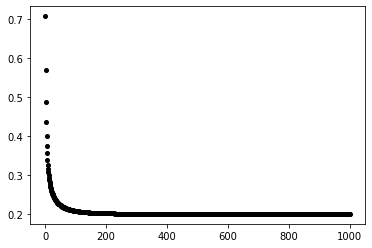

In [ ]:
plt.plot(J_list,'ko',markersize = 4)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(25.0, 100.0)

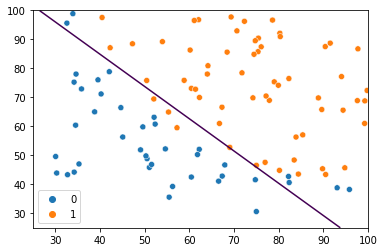

In [ ]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
xl, xr, dx = 25, 100, 0.1
yl, yr, dy = 25, 100, 0.1
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_scaled = (u-X_train_mean[0])/X_train_std[0]
v_scaled = (v-X_train_mean[1])/X_train_std[1]
f_grid = (w[0]*(u_scaled.reshape(1,len(u_scaled))) + (w[1]*v_scaled.reshape(len(v_scaled),1))) + b
#plt.figure(figsize=(4,4)) 
plt.contour(u,v,f_grid,levels=[0])
plt.xlim(25,100)
plt.ylim(25,100)


In [ ]:
y_hat_train = predictions_scaling(X_train,X_train_mean,X_train_std,w,b)
J_train = error(y_train,y_hat_train)
print(J_train)

0.20030646992792228


In [ ]:
print(J_list[-1])

0.20030646992792228


In [ ]:
y_hat_test = predictions_scaling(X_test,X_train_mean,X_train_std,w,b)
J_test = error(y_test,y_hat_test)
print(J_test)

0.23573211509841369


In [ ]:
accuracy_recall_precision(y_hat_train,y_train)

(0.9125, 0.9607843137254902, 0.9074074074074074)

In [ ]:
accuracy_recall_precision(y_hat_test,y_test)

(0.9, 0.8888888888888888, 0.8888888888888888)